In [23]:
import pandas as pd # data processing
import numpy as np
#import sysmpy as sy
df = pd.read_csv("location_dataset.csv", usecols=['start','end','id_colums'],parse_dates = ['start','end'])
df = pd.DataFrame(df)
#df['intercontact'] = df.groupby(['id_colums','start','end']).apply(lambda x:x['start'] - x['end'].shift(1))
def getIntercontact(x):
    x['intercontact'] = x['start'] - x['end'].shift(1)
    #x['intercontact'] = x['intercontact'] / np.timedelta(1,H)
    return x
dfNew = df.groupby(['id_colums']).apply(getIntercontact)
dfNew['intercontact'] = dfNew['intercontact'] / np.timedelta64(1,'h')
print(dfNew)
dfNew.to_csv('Intercontact_Dataset.csv', index=False,      encoding='utf-8')

                     start                 end id_colums  intercontact
0      2004-07-19 12:04:13 2004-07-19 12:08:45       1,3           NaN
1      2004-07-19 12:37:31 2004-07-19 12:38:19       4,7           NaN
2      2004-07-19 12:38:21 2004-07-19 12:41:58       4,7      0.000556
3      2004-07-20 08:00:44 2004-07-20 08:00:55       4,5           NaN
4      2004-07-20 08:01:10 2004-07-20 08:02:48       4,5      0.004167
...                    ...                 ...       ...           ...
786296 2005-06-20 18:12:41 2005-06-20 18:56:36     14,78      0.000000
786297 2005-06-21 12:53:48 2005-06-21 12:53:53     14,78     17.953333
786298 2005-06-21 12:54:40 2005-06-21 12:54:47     14,78      0.013056
786299 2005-06-21 14:51:02 2005-06-21 14:54:18     14,78      1.937500
786300 2005-06-22 16:13:31 2005-06-22 16:13:32     18,40     54.885000

[786301 rows x 4 columns]


In [9]:
import pandas as pd # data processing
import numpy as np
df = pd.read_csv("Intercontact_Dataset.csv", usecols=['start','id_colums', 'intercontact'],
                 index_col='start', parse_dates = ['start'])
df = pd.DataFrame(df)
#f['intercontact'] = 




#df.set_index(keys = ["start", "id_colums"])
#df = df.groupby('id_colums').resample('6H').mean().reset_index()
#df = df.reset_index()
df = df.groupby([df.index.floor("6H"), "id_colums"]).mean()
print(dfnew)
#df.to_csv('MeanIntercontact_Dataset.csv',      encoding='utf-8')

NameError: name 'dfnew' is not defined

INTERCONTACT PER_WINDOW_PER_ID

In [8]:
import pandas as pd # data processing
import numpy as np
#import sysmpy as sy
df = pd.read_csv("location_dataset.csv", usecols=['start','end','id_colums'],parse_dates = ['start','end'])
df = pd.DataFrame(df)



#df['intercontact'] = df.groupby(['id_colums','start','end']).apply(lambda x:x['start'] - x['end'].shift(1))

#df['hour'] = df['start'].dt.hour df = df.groupby('hour')['id_colums'].apply(getIntercontact)

#df['intercontact'] = df['start'].rolling('6h').groupby(['id_colums']).apply(getIntercontact)
#dfNew = df.groupby(['id_colums']).apply(getIntercontact)

#df.set_index('start_time', inplace=True)
#interval = 
def getIntercontact(x):
    x['intercontact'] = x['start'] - x['end'].shift(1)
   # x['intercontact'] = x['intercontact'] / np.timedelta(1,H)
    return x
dfnew = df.groupby([pd.Grouper(key='start', freq='6H'), 'id_colums']).apply(getIntercontact)
dfnew['intercontact'] = dfnew['intercontact'] / np.timedelta64(1,'h')
#interval = pd.date_range(start=min(df.index), end=max(df.end_time), freq='15Min')
#dfNew = df.groupby(['id_colums']).apply(getIntercontact)
#dfNew['intercontact'] = dfNew['intercontact'] / np.timedelta64(1,'h')
print(dfnew.head(50))
#dfnew.to_csv('Intercontact_Window.csv',  index=False,    encoding='utf-8')

                 start                 end id_colums  intercontact
0  2004-07-19 12:04:13 2004-07-19 12:08:45       1,3           NaN
1  2004-07-19 12:37:31 2004-07-19 12:38:19       4,7           NaN
2  2004-07-19 12:38:21 2004-07-19 12:41:58       4,7      0.000556
3  2004-07-20 08:00:44 2004-07-20 08:00:55       4,5           NaN
4  2004-07-20 08:01:10 2004-07-20 08:02:48       4,5      0.004167
5  2004-07-20 09:02:22 2004-07-20 09:02:32       5,7           NaN
6  2004-07-20 09:07:28 2004-07-20 09:07:31       5,7      0.082222
7  2004-07-20 09:07:31 2004-07-20 09:07:36       5,7      0.000000
8  2004-07-20 09:07:58 2004-07-20 09:08:11       5,7      0.006111
9  2004-07-20 09:08:21 2004-07-20 09:08:56       5,7      0.002778
10 2004-07-20 09:39:52 2004-07-20 09:41:01       4,7           NaN
11 2004-07-20 09:39:52 2004-07-20 09:41:01       5,7      0.515556
12 2004-07-20 09:43:32 2004-07-20 09:43:33       5,7      0.041944
13 2004-07-20 09:52:30 2004-07-20 09:53:09       5,7      0.14

MEAN_INTERCONTACT PER_WINDOW_PER_ID

In [12]:
import pandas as pd # data processing
import numpy as np
df = pd.read_csv("Intercontact_Window.csv", usecols=['start','id_colums', 'intercontact'],
                 index_col='start', parse_dates = ['start'])
df = pd.DataFrame(df)
df = df.groupby([df.index.floor("6H"), "id_colums"]).mean()
df['intercontact'] = df['intercontact'].fillna(0)
print(df)
df.to_csv('MeanIntercontact_Window.csv',    encoding='utf-8')

                               intercontact
start               id_colums              
2004-07-19 12:00:00 1,3            0.000000
                    4,7            0.000556
2004-07-20 06:00:00 4,5            1.662222
                    4,7            1.895278
                    5,7            0.230455
...                                     ...
2005-06-20 06:00:00 18,40          0.000000
2005-06-20 12:00:00 14,78          0.000000
2005-06-20 18:00:00 14,78          0.000000
2005-06-21 12:00:00 14,78          0.975278
2005-06-22 12:00:00 18,40          0.000000

[137985 rows x 1 columns]


In [67]:
import re
import numpy as np
import pandas as pd # data processing
df = pd.read_csv("locationInfo.csv", parse_dates = True)
df = pd.DataFrame(df)
K = ","
pct = .apply(lambda x:  tuple(int(x) for ele in sub.split(K)) for sub in df['area id'])
df['pct'] = pct
#df['area id'] = tuple(int(ele) for ele in sub.split(K)) for sub in df['area id']
"""df['area id'] = df['area id'].convert_dtypes()
df['area id'] = df['area id'].apply(lambda x: x.replace('[','').replace(']',''))
#df['area id'] =[int(x) if x.isnumeric() else x for x in df['area id'] ]
pct = df['area id'].apply(lambda x: int(x)**2 )
df['pct'] = pct
def summLoc():
    return sum(2**x)
def coerce_to_float(val):
    try:
       return float(val)
    except ValueError:
       return val

df["area id"] = df["area id"].apply(lambda x: coerce_to_float(x))
for x in df['area id']:
    def res(x): return x*2
    #ans.append(res(x))
    print(df.info())"""
#df["area id"] = df["area id"].apply(lambda x: x[1])
#df["area id"] = df["area id"].str.split(",").apply(lambda x: [int(i, 16) for i in x])
print(df.tail(20))
#print(df.info())

SyntaxError: invalid syntax (<ipython-input-67-578c56189e55>, line 7)

In [27]:
import pandas as pd # data processing
import numpy as np
import re
#import sysmpy as sy
df = pd.read_csv("locationInfo.csv",usecols=['area id','id_colums'])
df['area id'] = df['area id'].apply(lambda x: x.replace('[','').replace(']',''))
df = pd.DataFrame(df)
print(df.tail(20))
df.to_csv('areaforPrepo.csv',   index=False,    encoding='utf-8')
"""#print(df.head())
#df.set_index(keys = ["start", "id_colums"])
def summLoc():
    return sum(2**x)
df = df.groupby([df.index.floor("6H"), "id_colums"]).agg({'area id': lambda x: list(set(x))})

#df['area id'] = df['area id'].apply(lambda x: x.replace('[','').replace(']','').replace(',',";"))
#df = df["area id"].apply(lambda x: [int(i, 16) for i in x])

#print(df.tail())
#print(df["area id"].isna().sum())
#print(df)

df['intercontact'] = df.groupby(['id_colums','start','end']).apply(lambda x:x['start'] - x['end'].shift(1))
df = df['intercontact']


Slice data and list of area id


df = pd.DataFrame(df)
#

"""
"""
df = df.groupby([df.index.floor("6H"), "id_colums"]).agg({'area id': lambda x: list(x)})

df = pd.read_csv("locationInfo.csv")
df = pd.DataFrame(df)

print(df.head())"""
#df = pd.read_csv("locationInfo.csv", usecols=['area id'])
#df = pd.DataFrame(df)
#df = df.set_index(['start','id_colums'])

#def sumList(row):
#    return sum(listRow)
#s = [str (i) for i in df['area id']]
#res = str(" ".join(s))
#print(res)
#suml  = df['area id'].to_numpy()
#df["sum"] = sum(suml)
#df['area id'] = df['area id'].astype(str).astype(int)
#es = np.sum(df['area id'].iloc[1])
#print(res)


       id_colums area id
137965     14,78      15
137966     14,78   1, 15
137967     14,78      15
137968     14,78      15
137969     14,78       1
137970     14,78       1
137971     14,78      15
137972     14,78      15
137973     14,78      15
137974     14,78   1, 15
137975     14,78      15
137976     14,78       1
137977     14,78      15
137978     14,78      15
137979     14,78      15
137980     18,40      75
137981     14,78      15
137982     14,78      15
137983     14,78       1
137984     18,40      75


'\ndf = df.groupby([df.index.floor("6H"), "id_colums"]).agg({\'area id\': lambda x: list(x)})\n\ndf = pd.read_csv("locationInfo.csv")\ndf = pd.DataFrame(df)\n\nprint(df.head())'

          total
0           2.0
1           4.0
2           4.0
3           4.0
4           4.0
...         ...
137980      0.0
137981  32768.0
137982  32768.0
137983      2.0
137984      0.0

[137985 rows x 1 columns]


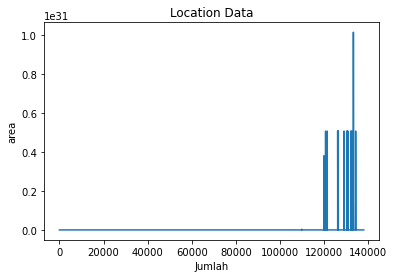

In [74]:
import pandas as pd # data processing
import matplotlib.pyplot as plt
df = pd.read_csv("areaforPrepo2.csv")

plt.xlabel("Jumlah")
plt.ylabel("area")
plt.title("Location Data")
plt.plot(df["total"])
df = pd.DataFrame(df)
print(df)

In [12]:
plt.plot(data.CLOSE)
plt.grid(False)
plt.show()

NameError: name 'data' is not defined

In [23]:
import pandas as pd # data processing
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("areaforPrepo.csv" )
def hitung(x):
    return (2**x)
#df[['area1','area2','area3','area4','area5','area6','area7','area8', 'area9','area10','area11', 'area12', 'area13', 'area14', 'area15','area16', 'area17', 'area18', 'area19', 'area20','area21','area22','area23','area24']] = df[['area1','area2','area3','area4','area5','area6','area7','area8', 'area9','area10','area11', 'area12', 'area13', 'area14', 'area15','area16', 'area17', 'area18', 'area19', 'area20','area21','area22','area23','area24']].apply(hitung)
df['total'] = df.iloc[:, -27:].isna().sum(axis=1)
#df = df['total']
df['spatialLoc'] = 25 - df['total']
df['hitung'] = df['spatialLoc'].apply(hitung)
df = df[['total','spatialLoc','hitung']]
#print(df['total'].tail(20))
#df = df[['id'],['total']]
print(df.tail(50))
df.to_csv('spatialNonRepeated.csv',   index=False,    encoding='utf-8')

        total  spatialLoc  hitung
137935     24           1       2
137936     23           2       4
137937     24           1       2
137938     24           1       2
137939     23           2       4
137940     24           1       2
137941     23           2       4
137942     23           2       4
137943     24           1       2
137944     24           1       2
137945     24           1       2
137946     24           1       2
137947     24           1       2
137948     24           1       2
137949     24           1       2
137950     24           1       2
137951     24           1       2
137952     24           1       2
137953     23           2       4
137954     24           1       2
137955     24           1       2
137956     24           1       2
137957     24           1       2
137958     24           1       2
137959     24           1       2
137960     24           1       2
137961     24           1       2
137962     23           2       4
137963     24 

In [25]:
import pandas as pd # data processing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("DATASET_BERES_update.csv",parse_dates=True)
df2 = pd.read_csv("DATASET_BERES1.csv", usecols=['SpatialLoc'])
df = pd.DataFrame(df)
df2 = pd.DataFrame(df2)
#merged_data =  pd.concat(
#    map(pd.read_csv, ['MeanIntercontact_Dataset.csv', 'areaforPrepo2.csv']), ignore_index=True)
#merged_data.set_index('ID_', inplace = True)
#df2.rename(columns = {'intercontact':'MeanInt_Norm'}, inplace = True)
#df3 = pd.concat([df, df2], axis=1)
#df = df.drop(df.columns[[4,5]], axis=1)
df.rename(columns = {'intercontact':'MeanInt'},inplace = True)
"""    'MeanInt_Standarization':'Mean_intercontact',
                     'SpatialLoc_Standarization':'SpatialLoc',
                     'intercontact':'MeanInt_Standarization',
                     'spatiaLoc':'SpatialLoc_Standarization'}, inplace = True)"""
#print(df3)
#newdf = ["start","id_colums","intercontact","SpatialLoc"]
#df = df[newdf]
#print(df.head(50))
scaler = StandardScaler()
df[['intercontact','SpatialLoc']] =scaler.fit_transform(df[['intercontact','SpatialLoc']])
print(df.head(50))
#new_df = df3.groupby(['id_colums'])['start'].count()

#print(new_df.head(30))
#print(new_df1.head(30))
#print(len(new_df))
#df.to_csv('DATASET_BERES_WindowzScore.csv',   index=False,    encoding='utf-8')

KeyError: "['intercontact'] not in index"

In [17]:
import pandas as pd # data processing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
df = pd.read_csv("DATASET_BERES_WindowzScore_ID.csv",parse_dates=True)
df = pd.DataFrame(df)
#df_pivot=df.pivot(index=['id_colums'], columns='start')['intercontact'],['SpatialLoc']
df_pivot=df.pivot(index=['start'], columns='id_colums')['intercontact'],['SpatialLoc']
print(df_pivot)


(id_colums            0,1  0,10  0,11  0,12  0,13  0,14  0,15  0,16  0,17  \
start                                                                      
2004-07-19 12:00:00  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2004-07-20 06:00:00  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2004-07-20 12:00:00  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2004-07-21 00:00:00  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2004-07-21 06:00:00  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...                  ...   ...   ...   ...   ...   ...   ...   ...   ...   
2005-06-20 06:00:00  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2005-06-20 12:00:00  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2005-06-20 18:00:00  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2005-06-21 12:00:00  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2005-06-22 12:00:00  NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

id_colums 